<a href="https://colab.research.google.com/github/ajaythakur3369/CodeClause-Internship/blob/main/Personality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Personality Prediction**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - CodeClause**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/CodeClause-Internship)**

## **1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Data Load and its Preview**

In [ ]:
# Access the Drive from Colab for accessing the file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Path for accessing the required file from Drive
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/CodeClause/File_Name/MBTI_dataset.csv')

In [ ]:
data.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


## **3. List of posts**

In [ ]:
[p.split('|||') for p in data.head(2).posts.values]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

## **4. Distribution of the MBTI personality types**

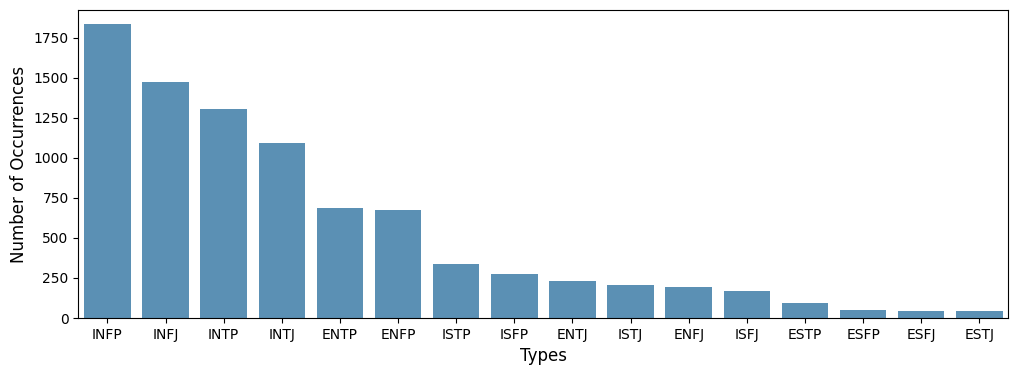

In [ ]:
cnt_types = data['type'].value_counts()
plt.figure(figsize = (12, 4))
sns.barplot(x = cnt_types.index, y = cnt_types.values, alpha = 0.8)
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Types', fontsize = 12)
plt.show()

**Unbalanced occurrences**

## **5. Add columns for the type Indicators**

In [ ]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0

    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')

    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')

    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')

    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J })

data = data.join(data.apply (lambda row: get_types (row), axis = 1))
data.head(5)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


In [ ]:
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) – Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) – Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) – Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) – Sensing (S):		 1197  /  7478
Thinking (T) – Feeling (F):		 4694  /  3981
Judging (J) – Perceiving (P):		 5241  /  3434


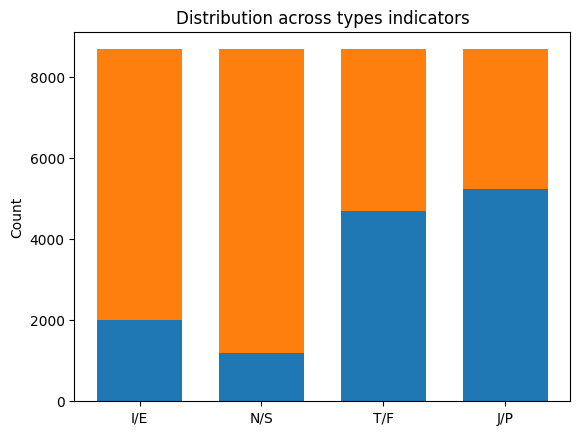

In [ ]:
N = 4
but = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])

# The x locations for the groups
ind = np.arange(N)

# The width of the bars can also be a sequence of length len(x)
width = 0.7

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom = but)

plt.ylabel('Count')
plt.title('Distribution across types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

## **6. Pearson Features Correlation**

In [ ]:
data[['IE', 'NS', 'TF', 'JP']].corr()

,IE,NS,TF,JP
IE,1.000000,-0.045899,-0.069573,0.161939
NS,-0.045899,1.000000,-0.080954,0.014922
TF,-0.069573,-0.080954,1.000000,-0.004673
JP,0.161939,0.014922,-0.004673,1.000000


It is unclear if the matrix shows anything valuable for interpretation.

<Axes: title={'center': 'Pearson Features Correlation'}>

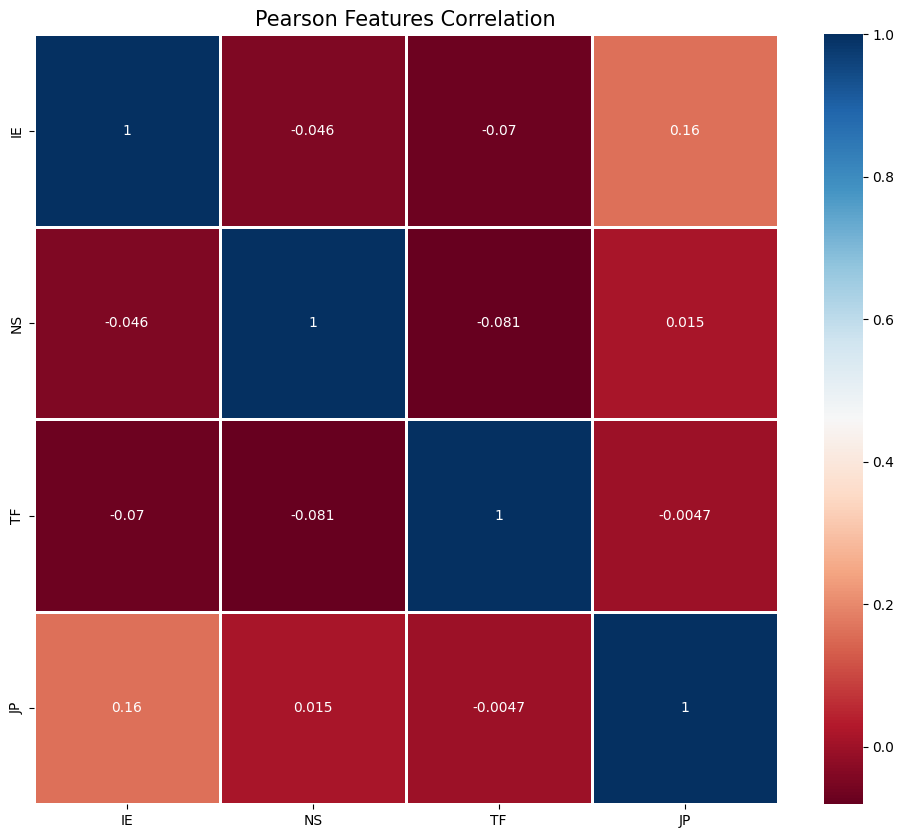

In [ ]:
cmap = plt.cm.RdBu
corr = data[['IE', 'NS', 'TF', 'JP']].corr()
plt.figure(figsize = (12, 10))
plt.title('Pearson Features Correlation', size = 15)
sns.heatmap(corr, cmap = cmap,  annot = True, linewidths = 1)

## **7. Prepare data**

Binarize type indicator (better implementation than mine above)

In [ ]:
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

# Transform MBTI to binary vector
def translate_personality(personality):
    return [b_Pers[l] for l in personality]

# Transform binary vector to MBTI personality
def translate_back(personality):

    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

# Check
d = data.head(4)
list_personality_bin = np.array([translate_personality(p) for p in d.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 1 0]]


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Compute list of subjects with type | list of comments
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize

# Resource stopwords not found
# Please use the NLTK Downloader to obtain the resource
# We want to remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

unique_type_list = [x.lower() for x in unique_type_list]

# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed
cachedStopWords = stopwords.words("english")

def pre_process_data(data, remove_stop_words=True, remove_mbti_profiles=True):

    list_personality = []
    list_posts = []
    len_data = len(data)
    i = 0

    for row in data.iterrows():
        i+=1
        if (i % 500 == 0 or i == 1 or i == len_data):
            print("%s of %s rows" % (i, len_data))

        # Remove and clean comments
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")

        type_labelized = translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)

    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

In [ ]:
# Resource 'wordnet' not found
# Please use the NLTK Downloader to obtain the resource
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
list_posts, list_personality  = pre_process_data(data, remove_stop_words = True)

1 of 8675 rows
500 of 8675 rows
1000 of 8675 rows
1500 of 8675 rows
2000 of 8675 rows
2500 of 8675 rows
3000 of 8675 rows
3500 of 8675 rows
4000 of 8675 rows
4500 of 8675 rows
5000 of 8675 rows
5500 of 8675 rows
6000 of 8675 rows
6500 of 8675 rows
7000 of 8675 rows
7500 of 8675 rows
8000 of 8675 rows
8500 of 8675 rows
8675 of 8675 rows


In [ ]:
print("Number of posts and personalities: ",  list_posts.shape, list_personality.shape)

Number of posts and personalities:  (8675,) (8675, 4)


In [ ]:
list_posts[0]

'   moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady complimentary personality well h

In [ ]:
list_personality[0]

array([0, 0, 0, 0])

## **8. Vectorize with count and TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

# Convert posts to a matrix of token counts
cntizer = CountVectorizer(analyzer = "word",
                             max_features = 1500,
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_df = 0.7,
                             min_df = 0.1)

# Learn the vocabulary dictionary and return the term-document matrix
print("CountVectorizer")
X_cnt = cntizer.fit_transform(list_posts)

# Transform the count matrix into a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

print("TF-IDF")
# Learn the idf vector (fit) and transform a count matrix into a tf-idf representation
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

CountVectorizer
TF-IDF


In [ ]:
feature_names = list(enumerate(cntizer.get_feature_names_out()))
feature_names

[(0, 'ability'),
 (1, 'able'),
 (2, 'absolutely'),
 (3, 'accept'),
 (4, 'accurate'),
 (5, 'across'),
 (6, 'act'),
 (7, 'action'),
 (8, 'actual'),
 (9, 'actually'),
 (10, 'add'),
 (11, 'admit'),
 (12, 'advice'),
 (13, 'afraid'),
 (14, 'age'),
 (15, 'ago'),
 (16, 'agree'),
 (17, 'ah'),
 (18, 'almost'),
 (19, 'alone'),
 (20, 'along'),
 (21, 'already'),
 (22, 'although'),
 (23, 'amazing'),
 (24, 'amount'),
 (25, 'angry'),
 (26, 'animal'),
 (27, 'annoying'),
 (28, 'another'),
 (29, 'answer'),
 (30, 'anxiety'),
 (31, 'anymore'),
 (32, 'anyone'),
 (33, 'anything'),
 (34, 'anyway'),
 (35, 'apparently'),
 (36, 'appreciate'),
 (37, 'approach'),
 (38, 'area'),
 (39, 'argument'),
 (40, 'around'),
 (41, 'art'),
 (42, 'ask'),
 (43, 'asked'),
 (44, 'asking'),
 (45, 'aspect'),
 (46, 'assume'),
 (47, 'attention'),
 (48, 'attracted'),
 (49, 'avatar'),
 (50, 'avoid'),
 (51, 'aware'),
 (52, 'away'),
 (53, 'awesome'),
 (54, 'awkward'),
 (55, 'baby'),
 (56, 'back'),
 (57, 'bad'),
 (58, 'based'),
 (59, 'basi

In [ ]:
X_tfidf.shape

(8675, 791)

## **9. X / Y data**

In [ ]:
print("X: Posts in tf-idf representation \n* 1st row:\n%s" % X_tfidf[0])

X: Posts in tf-idf representation 
* 1st row:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08042209 0.06830218 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10331537 0.         0.04973404 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10984584 0.         0.         0.         0.08642509
 0.         0.         0.10488948 0.         0.         0.
 0.         0.         0.05188886 0.06824736 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0

In [ ]:
type_indicators = ["IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) – Sensing (S)",
                   "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) – Perceiving (P)"]

for l in range(len(type_indicators)):
    print(type_indicators[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) – Sensing (S)
FT: Feeling (F) - Thinking (T)
JP: Judging (J) – Perceiving (P)


In [ ]:
print("MBTI 1st row: %s" % translate_back(list_personality[0, :]))
print("Y: Binarized MBTI, 1st row: %s" % list_personality[0, :])

MBTI 1st row: INFJ
Y: Binarized MBTI, 1st row: [0 0 0 0]


## **10. First XGBoost model for the MBTI dataset**

In [ ]:
# First XGBoost model for the MBTI dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# The posts are represented in TF-IDF format
X = X_tfidf

# Let's train the type indicators individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))

    # Let's train each type indicator individually
    Y = list_personality[:, l]

    # Split the data into training and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

    # Fit the model on the training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # Make predictions for the test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]

    # Evaluate the predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 77.19%
NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) Accuracy: 86.20%
FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) Accuracy: 72.76%
JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) Accuracy: 63.85%


## **11. Monitor Performance and consider Early Stopping**

In [ ]:
# Let's train each type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))

    Y = list_personality[:,l]

    # Split the data into training and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

    # Fit the model on the training data
    model = XGBClassifier()
    eval_set = [(X_test, y_test)]
    model.fit(X_train, y_train, early_stopping_rounds = 10, eval_metric = "logloss", eval_set = eval_set, verbose = True)

    # Make predictions for the test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]

    # Evaluate the predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.52235
[1]	validation_0-logloss:0.51743
[2]	validation_0-logloss:0.51278
[3]	validation_0-logloss:0.51286
[4]	validation_0-logloss:0.51249
[5]	validation_0-logloss:0.51223
[6]	validation_0-logloss:0.51405
[7]	validation_0-logloss:0.51518
[8]	validation_0-logloss:0.51684
[9]	validation_0-logloss:0.51856
[10]	validation_0-logloss:0.51895
[11]	validation_0-logloss:0.51933
[12]	validation_0-logloss:0.51774
[13]	validation_0-logloss:0.51885
[14]	validation_0-logloss:0.51858
[15]	validation_0-logloss:0.51454
* IE: Introversion (I) / Extroversion (E) Accuracy: 77.47%
NS: Intuition (N) – Sensing (S) ...


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.40384
[1]	validation_0-logloss:0.40097
[2]	validation_0-logloss:0.39748
[3]	validation_0-logloss:0.39532
[4]	validation_0-logloss:0.39393
[5]	validation_0-logloss:0.39440
[6]	validation_0-logloss:0.39439
[7]	validation_0-logloss:0.39494
[8]	validation_0-logloss:0.39543
[9]	validation_0-logloss:0.39496
[10]	validation_0-logloss:0.39537
[11]	validation_0-logloss:0.39521
[12]	validation_0-logloss:0.39441
[13]	validation_0-logloss:0.39356
[14]	validation_0-logloss:0.39364
[15]	validation_0-logloss:0.39426
[16]	validation_0-logloss:0.39556
[17]	validation_0-logloss:0.39722
[18]	validation_0-logloss:0.39709
[19]	validation_0-logloss:0.39699
[20]	validation_0-logloss:0.39778
[21]	validation_0-logloss:0.39863
[22]	validation_0-logloss:0.39956
[23]	validation_0-logloss:0.40039
* NS: Intuition (N) – Sensing (S) Accuracy: 85.78%
FT: Feeling (F) - Thinking (T) ...


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.66845
[1]	validation_0-logloss:0.65677
[2]	validation_0-logloss:0.64056
[3]	validation_0-logloss:0.63302
[4]	validation_0-logloss:0.62377
[5]	validation_0-logloss:0.61735
[6]	validation_0-logloss:0.61100
[7]	validation_0-logloss:0.60659
[8]	validation_0-logloss:0.60007
[9]	validation_0-logloss:0.59344
[10]	validation_0-logloss:0.59091
[11]	validation_0-logloss:0.58906
[12]	validation_0-logloss:0.58421
[13]	validation_0-logloss:0.58164
[14]	validation_0-logloss:0.58089
[15]	validation_0-logloss:0.57987
[16]	validation_0-logloss:0.58011
[17]	validation_0-logloss:0.57946
[18]	validation_0-logloss:0.57941
[19]	validation_0-logloss:0.57743
[20]	validation_0-logloss:0.57663
[21]	validation_0-logloss:0.57541
[22]	validation_0-logloss:0.57462
[23]	validation_0-logloss:0.57393
[24]	validation_0-logloss:0.57465
[25]	validation_0-logloss:0.57239
[26]	validation_0-logloss:0.57169
[27]	validation_0-logloss:0.57139
[28]	validation_0-logloss:0.57103
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.65699
[1]	validation_0-logloss:0.65091
[2]	validation_0-logloss:0.64989
[3]	validation_0-logloss:0.65105
[4]	validation_0-logloss:0.65063
[5]	validation_0-logloss:0.65053
[6]	validation_0-logloss:0.65173
[7]	validation_0-logloss:0.65080
[8]	validation_0-logloss:0.65281
[9]	validation_0-logloss:0.65434
[10]	validation_0-logloss:0.65181
[11]	validation_0-logloss:0.65359
[12]	validation_0-logloss:0.65529
* JP: Judging (J) – Perceiving (P) Accuracy: 62.56%


## **12. Show the feature importance plot and list for the first indicator:**

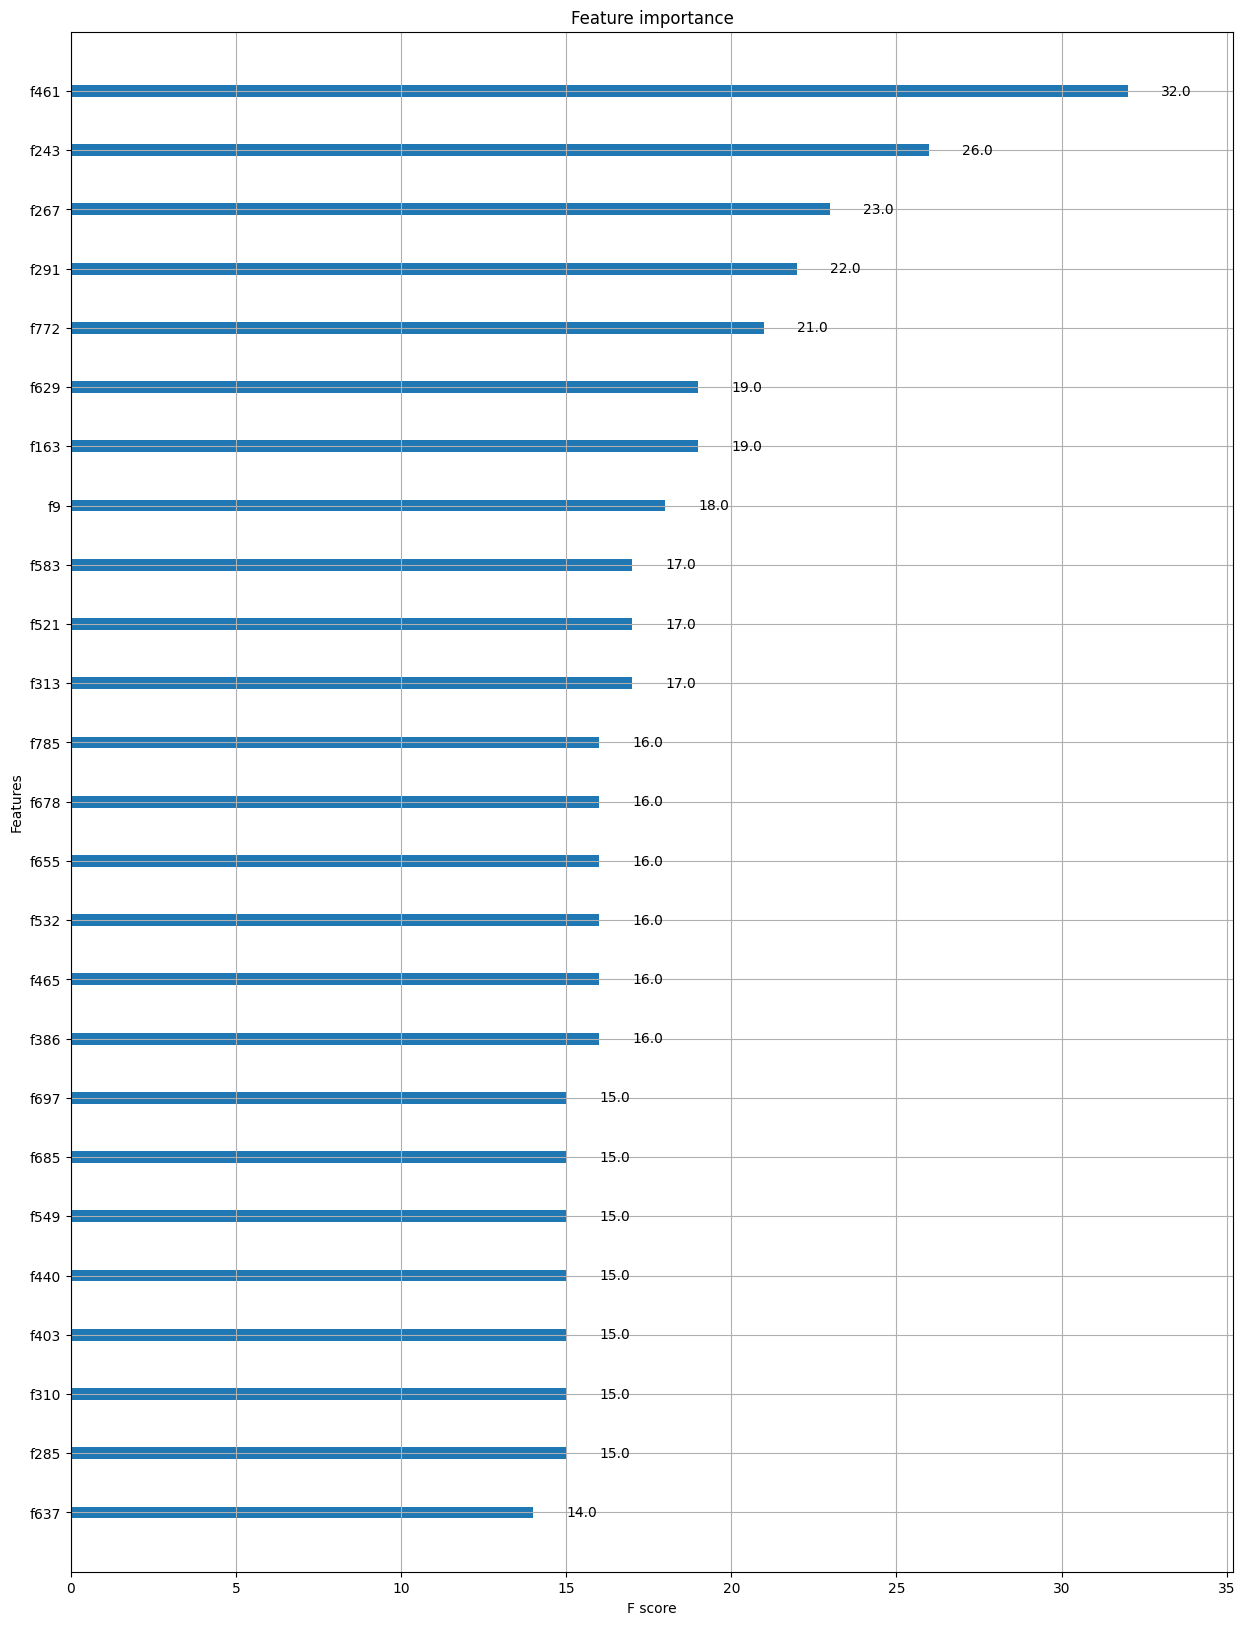

In [ ]:
from xgboost import plot_importance

# Only for the 1st indicator
y = list_personality[:, 0]

# Fit the model on the training data
model = XGBClassifier()
model.fit(X, y)

# Plot the feature importance
ax = plot_importance(model, max_num_features = 25)

fig = ax.figure
fig.set_size_inches(15, 20)
plt.show()

In [ ]:
features = sorted(list(enumerate(model.feature_importances_)), key = lambda x: x[1], reverse = True)
for f in features[0:25]:
    print("%d\t%f\t%s" % (f[0], f[1], cntizer.get_feature_names_out()[f[0]]))

# Save the xgb_params for later discussion
default_get_xgb_params = model.get_xgb_params()

760	0.004610	whole
430	0.004602	member
672	0.004269	suppose
50	0.004125	avoid
461	0.003942	ne
291	0.003862	guy
670	0.003814	super
551	0.003728	quiet
292	0.003552	haha
544	0.003398	public
477	0.003392	nt
750	0.003290	water
435	0.003263	mentioned
571	0.003227	remember
139	0.003177	crazy
183	0.003109	dream
403	0.003089	lol
664	0.003056	study
265	0.003054	fuck
267	0.003045	fun
94	0.003034	cat
467	0.003027	ni
53	0.003023	awesome
335	0.003021	ideal
480	0.003012	obviously


In [ ]:
# Save the xgb_params for later discussion
default_get_xgb_params = model.get_xgb_params()
print(default_get_xgb_params)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [ ]:
def plot_confusion_matrix(
        cm,
        classes,
        normalize = False,
        title = "Confusion Matrix",
        cmap = plt.cm.Blues):

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 78.66%
Confusion matrix, without normalization
[[2161   68]
 [ 543   91]]


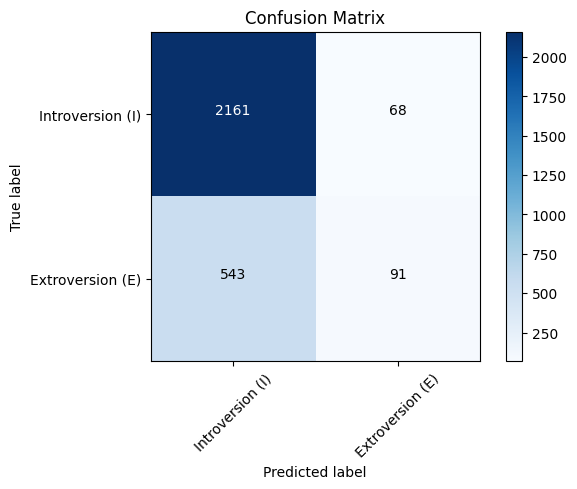

NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) Accuracy: 85.78%
Confusion matrix, without normalization
[[2450   13]
 [ 394    6]]


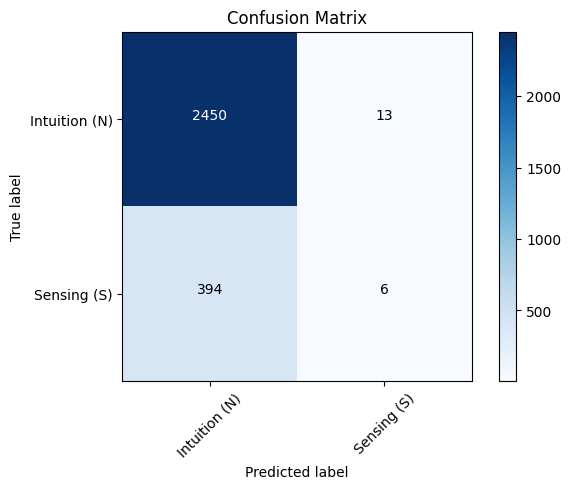

FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) Accuracy: 74.29%
Confusion matrix, without normalization
[[1188  366]
 [ 370  939]]


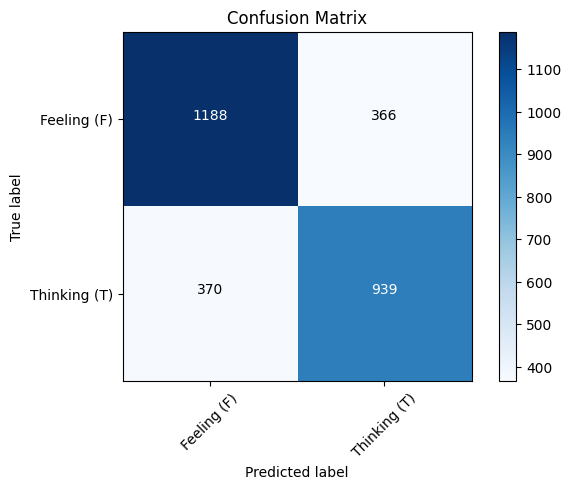

JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) Accuracy: 65.98%
Confusion matrix, without normalization
[[ 442  677]
 [ 297 1447]]


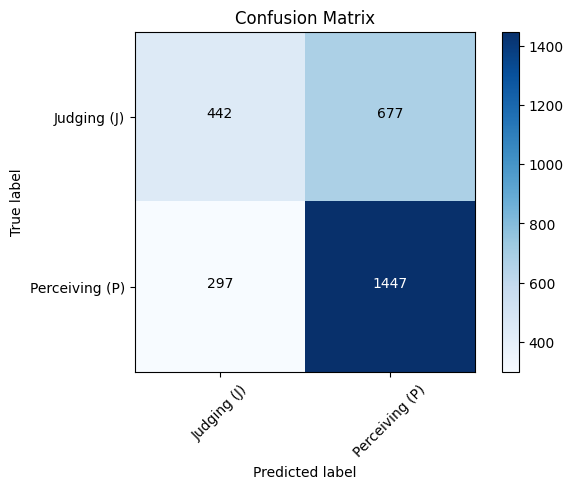

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import re

# Set up parameters for XGBoost
param = {}

param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

# Let's train each type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))

    Y = list_personality[:, l]

    # Split the data into training and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

    # Fit the model on the training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)

    # Make predictions for the test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]

    # Evaluate the predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_class = re.split(' / | – |: | - ', type_indicators[l])
    plot_confusion_matrix(cm, [cm_class[1], cm_class[2]], title = "Confusion Matrix")

## **13. XGBoost Hyperparameter Tuning**

In [ ]:
# Tune the learning_rate
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Posts in TF-IDF representation
X = X_tfidf

# Set up parameters for XGBoost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

# Let's train each type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))

    Y = list_personality[:,l]
    model = XGBClassifier(**param)

    print("hello")
    param_grid = {
        'n_estimators' : [ 200, 300],
        'learning_rate': [ 0.2, 0.3]
    }

    kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 7)
    grid_search = GridSearchCV(model, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold)
    grid_result = grid_search.fit(X, Y)

    # Summarize results
    print("* Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("* %f (%f) with: %r" % (mean, stdev, param))


IE: Introversion (I) / Extroversion (E) ...
hello
* Best: -0.495798 using {'learning_rate': 0.2, 'n_estimators': 200}
* -0.495798 (0.010980) with: {'learning_rate': 0.2, 'n_estimators': 200}
* -0.497622 (0.010717) with: {'learning_rate': 0.2, 'n_estimators': 300}
* -0.501694 (0.013118) with: {'learning_rate': 0.3, 'n_estimators': 200}
* -0.506760 (0.014386) with: {'learning_rate': 0.3, 'n_estimators': 300}
NS: Intuition (N) – Sensing (S) ...
hello
* Best: -0.474767 using {'learning_rate': 0.2, 'n_estimators': 200}
* -0.474767 (0.011105) with: {'learning_rate': 0.2, 'n_estimators': 200}
* -0.527485 (0.015531) with: {'learning_rate': 0.2, 'n_estimators': 300}
* -0.551367 (0.014094) with: {'learning_rate': 0.3, 'n_estimators': 200}
* -0.603927 (0.015174) with: {'learning_rate': 0.3, 'n_estimators': 300}
FT: Feeling (F) - Thinking (T) ...
hello
* Best: -0.548374 using {'learning_rate': 0.2, 'n_estimators': 200}
* -0.548374 (0.033606) with: {'learning_rate': 0.2, 'n_estimators': 200}
* -0.5

## **14. Predicting your own Myers-Briggs Personality Type**

In [ ]:
# A few tweets and blog posts
my_posts = """Getting started with data science and applying machine learning has never been as simple as it is now. There are many free and paid online tutorials and courses out there to help you to get started. I’ve recently started to learn, play, and work on Data Science & Machine Learning on Kaggle.com. In this brief post, I’d like to share my experience with the Kaggle Python Docker image, which simplifies the Data Scientist’s life.
Awesome #AWS monitoring introduction.
HPE Software (now @MicroFocusSW) won the platinum reader's choice #ITAWARDS 2017 in the new category #CloudMonitoring
Certified as AWS Certified Solutions Architect
Hi, please have a look at my Udacity interview about online learning and machine learning,
Very interesting to see the  lessons learnt during the HP Operations Orchestration to CloudSlang journey. http://bit.ly/1Xo41ci
I came across a post on devopsdigest.com and need your input: “70% DevOps organizations Unhappy with DevOps Monitoring Tools”
In a similar investigation I found out that many DevOps organizations use several monitoring tools in parallel. Senu, Nagios, LogStach and SaaS offerings such as DataDog or SignalFX to name a few. However, one element is missing: Consolidation of alerts and status in a single pane of glass, which enables fast remediation of application and infrastructure uptime and performance issues.
Sure, there are commercial tools on the market for exactly this use case but these tools are not necessarily optimized for DevOps.
So, here my question to you: In your DevOps project, have you encountered that the lack of consolidation of alerts and status is a real issue? If yes, how did you approach the problem? Or is an ChatOps approach just right?
You will probably hear more and more about ChatOps - at conferences, DevOps meet-ups or simply from your co-worker at the coffee station. ChatOps is a term and concept coined by GitHub. It's about the conversation-driven development, automation, and operations.
Now the question is: why and how would I, as an ops-focused engineer, implement and use ChatOps in my organization? The next question then is: How to include my tools into the chat conversation?
Let’s begin by having a look at a use case. The Closed Looped Incidents Process (CLIP) can be rejuvenated with ChatOps. The work from the incident detection runs through monitoring until the resolution of issues in your application or infrastructure can be accelerated with improved, cross-team communication and collaboration.
In this blog post, I am going to describe and share my experience with deploying HP Operations Manager i 10.0 (OMi) on HP Helion Public Cloud. An Infrastructure as a Service platform such as HP Helion Public Cloud Compute is a great place to quickly spin-up a Linux server and install HP Operations Manager i for various use scenarios. An example of a good use case is monitoring workloads across public clouds such as AWS and Azure.
"""

# The type is just a dummy so that the data prep function can be reused
mydata = pd.DataFrame(data={'type': ['INFJ'], 'posts': [my_posts]})

my_posts, dummy  = pre_process_data(mydata, remove_stop_words = True)

my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

1 of 1 rows


## **15. Fit and predict the 4 type indicators:**

In [ ]:
# Set up parameters for XGBoost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2
result = []

# Let's train each type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))

    Y = list_personality[:, l]

    # Split the data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

    # Fit the model on the training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)

    # Make predictions for my data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])

IE: Introversion (I) / Extroversion (E) ...
NS: Intuition (N) – Sensing (S) ...
FT: Feeling (F) - Thinking (T) ...
JP: Judging (J) – Perceiving (P) ...


## **16. Show result**

In [ ]:
print("The result is: ", translate_back(result))

The result is:  INTJ
